# Line Plots

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load dataset
fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Example 1

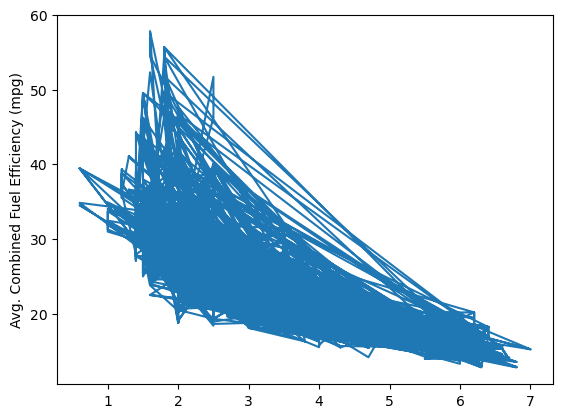

In [4]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

### Example 2

In [5]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

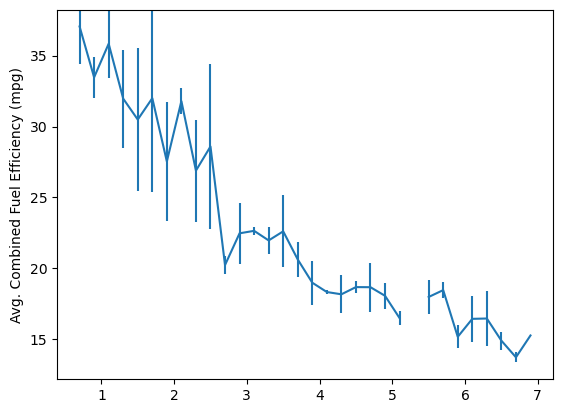

In [6]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## Alternate Variations

***Note about the DataFrame object used in the examples below.*** \
The visualizations below are based on a synthetic dataframe object `df`, and show the plots based on its numeric (quantitative) variables, `num_var1`,`num_var2`, and a categorical (qualitative) variable, `cat_var`. **The new dataframe has been chosen to reflect the additional relationship between the selected variables.**

### Example 3

In [ ]:
# compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

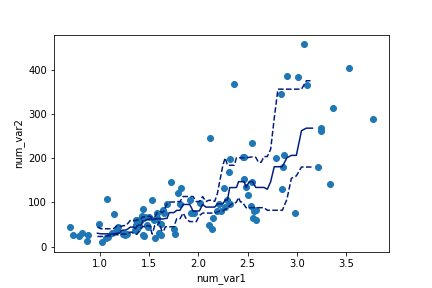

### Example 4

In [ ]:
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()

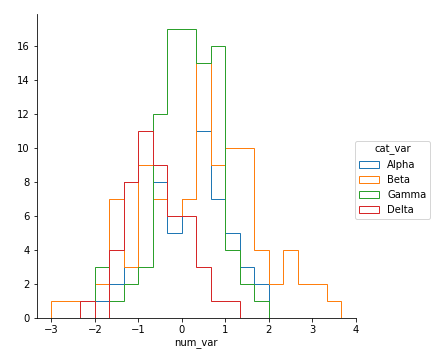

### Example 5

In [ ]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

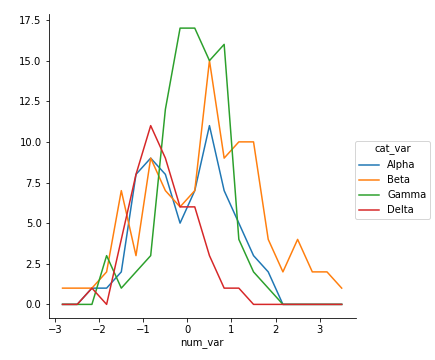